In [ ]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Gemini 2.0 Image generation in Vertex AI with REST API

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_2_0_image_gen_rest_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fgetting-started%2Fintro_gemini_2_0_image_gen_rest_api.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>       
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_2_0_image_gen_rest_api.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/getting-started/iintro_gemini_2_0_image_gen_rest_api.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_2_0_image_gen_rest_api.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_2_0_image_gen_rest_api.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_2_0_image_gen_rest_api.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/53/X_logo_2023_original.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_2_0_image_gen_rest_api.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/getting-started/intro_gemini_2_0_image_gen_rest_api.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>
   


| | |
|-|-|
|Author(s) | [Nikita Namjoshi](https://github.com/nikitamaia)|

## Overview

In this tutorial, you learn how to use Gemini 2.0's image generation features in Vertex AI using the REST API.

You'll try out the following scenarios:
* text --> image
* text --> image + text (interleaved)
* text + image --> image


## Getting Started

### Install required libraries

In [1]:
%%capture

!sudo apt install -q jq

### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.

In [2]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [3]:
PROJECT_ID = "your-project-id"  # @param {type: "string", isTemplate: true}
LOCATION = "us-central1"  # @param {type: "string"}

## Use the Gemini 2.0 Flash model

In [4]:
MODEL_ID = "gemini-2.0-flash-exp"  # @param {type: "string"}

### Defining environment variables for cURL commands

These environment variables are used to construct the cURL commands.

In [5]:
import os

os.environ["PROJECT_ID"] = PROJECT_ID
os.environ["LOCATION"] = LOCATION

API_HOST = f"{LOCATION}-aiplatform.googleapis.com"
os.environ[
    "API_ENDPOINT"
] = f"{API_HOST}/v1/projects/{PROJECT_ID}/locations/{LOCATION}/publishers/google/models/{MODEL_ID}"

## Generate Text + Image

First, send a text prompt to Gemini 2.0 describing the image you want generated.


In the curl command below, you'll see that the payload includes the following keys:

* `contents`: this is your prompt, in this case a text only user message
*`generation_config`: this dictionary specifies the desired output modalities, in this case `TEXT` and `IMAGE`. If you do not specify `IMAGE`, you will not get image output.

The cell below writes the ouptut of running the curl command to the file `response.json`.

In [38]:
%%bash

curl -X POST \
  -H "Authorization: Bearer $(gcloud auth print-access-token)" \
  -H "Content-Type: application/json" \
  https://${API_ENDPOINT}:generateContent \
  -d '{
    "contents": {
      "role": "USER",
      "parts": { "text": "generate an image of a grackle wearing a top hat and monocle."},
    },
    "generation_config": {
      "response_modalities": ["TEXT", "IMAGE"],
     },
  }' 2>/dev/null >response.json

Let's examine the output in the `response.json` file.

In `content` you can see the model has created an `image/png` which is the b64 encoded value to the `data` key.

In [39]:
!cat response.json

{
  "candidates": [
    {
      "content": {
        "role": "model",
        "parts": [
          {
            "inlineData": {
              "mimeType": "image/png",
              "data": "iVBORw0KGgoAAAANSUhEUgAAAYwAAAIACAIAAAAewcwjAAAAiXpUWHRSYXcgcHJvZmlsZSB0eXBlIGlwdGMAAAiZTYwxDgIxDAT7vOKekDjrtV1T0VHwgbtcIiEhgfh/QaDgmGlWW0w6X66n5fl6jNu9p+ULkapDENgzpj+Kl5aFfa6KnYWgSjZjGOiSYRxTY/v8KIijI/rXyc236kHdAK22RvHVummEN+91ML0BQ+siou79WmMAAAKHaVRYdFhNTDpjb20uYWRvYmUueG1wAAAAAAA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA1LjUuMCI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOklwdGM0eG1wRXh0PSJodHRwOi8vaXB0Yy5vcmcvc3RkL0lwdGM0eG1wRXh0LzIwMDgtMDItMjkvIiB4bWxuczpwaG90b3Nob3A9Imh0dHA6Ly9ucy5hZG9iZS5jb20vcGhvdG9zaG9wLzEuMC8iIElwdGM0eG1wRXh0OkRpZ2l0YWxTb3VyY2VGaWxlVHlwZT0iaHR0cDovL2N2LmlwdGMub3JnL25ld3Njb2Rlcy9ka

Next, load in the data from the `response.json` file so it's easier to work with in Python.

In [40]:
import json

with open("response.json") as f:
    response_data = json.load(f)
    print(response_data)

{'candidates': [{'content': {'role': 'model', 'parts': [{'inlineData': {'mimeType': 'image/png', 'data': 'iVBORw0KGgoAAAANSUhEUgAAAYwAAAIACAIAAAAewcwjAAAAiXpUWHRSYXcgcHJvZmlsZSB0eXBlIGlwdGMAAAiZTYwxDgIxDAT7vOKekDjrtV1T0VHwgbtcIiEhgfh/QaDgmGlWW0w6X66n5fl6jNu9p+ULkapDENgzpj+Kl5aFfa6KnYWgSjZjGOiSYRxTY/v8KIijI/rXyc236kHdAK22RvHVummEN+91ML0BQ+siou79WmMAAAKHaVRYdFhNTDpjb20uYWRvYmUueG1wAAAAAAA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJYTVAgQ29yZSA1LjUuMCI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOklwdGM0eG1wRXh0PSJodHRwOi8vaXB0Yy5vcmcvc3RkL0lwdGM0eG1wRXh0LzIwMDgtMDItMjkvIiB4bWxuczpwaG90b3Nob3A9Imh0dHA6Ly9ucy5hZG9iZS5jb20vcGhvdG9zaG9wLzEuMC8iIElwdGM0eG1wRXh0OkRpZ2l0YWxTb3VyY2VGaWxlVHlwZT0iaHR0cDovL2N2LmlwdGMub3JnL25ld3Njb2Rlcy9kaWdpdGFsc291cmNldHlwZS90cmFpbmVkQWxnb3JpdGhtaWNNZWRpYSIgSXB0YzR4bXBFeHQ6RGlnaXRhbFNvdX

Extract the image data from the response and visualize.

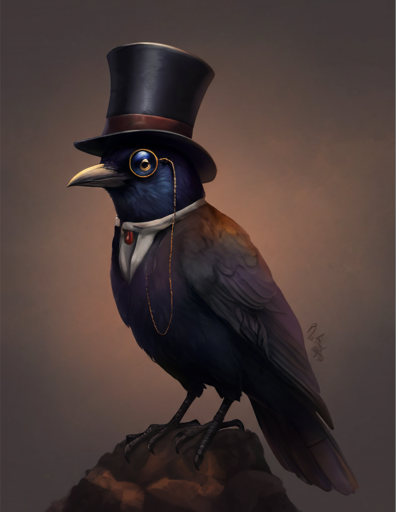

In [41]:
import base64

from IPython.display import Image, display

image_part = next(
    filter(
        lambda x: "inlineData" in x,
        response_data["candidates"][0]["content"]["parts"],
    )
)

image_data = base64.b64decode(image_part["inlineData"]["data"])
display(Image(data=image_data))

## Generate Text + Image

In addition to generating images, Gemini can generate multiple images and text in an interleaved fashion.

For example, you could ask the model to generate a recipe for banana bread with image showing different stages of the cooking process. Our you could ask the model to generate a images of different wildflowers with accompanying titles and descriptions.

Let's try out the interleaved text+image functionality by prompting Gemini 2.0 to create an illustrated children's story.

Here's the prompt:

*Make a children’s storybook about a curious young fox named Mosi, who sets off on a magical adventure through a forest in search of a special star. The story unfolds over three episodes, with each episode introducing Mosi to a new friend and revealing wondrous and magical landscapes.  For each episode, provide a title, a captivating narrative, and also generate a realistic image illustrating everything in the scene described in the narrative of that episode.*

You'll notice that in the prompt we ask the model to generate both text and images for each episode of the narrative. This will nudge the model to create text with images interleaved.

⚠️ Note that we are asking the model to generate a lot of content in this prompt, so it will take a bit of time for this cell to finish executing.

In [22]:
%%bash

curl -X POST \
  -H "Authorization: Bearer $(gcloud auth print-access-token)" \
  -H "Content-Type: application/json" \
  https://${API_ENDPOINT}:generateContent \
  -d '{
    "contents": {
      "role": "USER",
      "parts": { "text": "Make a children’s storybook about a curious young fox named Mosi, who sets off on a magical adventure through a forest in search of a special star.  The story unfolds over three episodes, with each episode introducing Mosi to a new friend and revealing wondrous and magical landscapes.  For each episode, provide a title, a captivating narrative, and also generate a realistic image illustrating everything in the scene described in the narrative of that episode."},
    },
    "generation_config": {
      "response_modalities": ["TEXT", "IMAGE"],
     },
  }' 2>/dev/null >response.json

This time, when we look at the model response, you'll see 3 `text` values with 3 b64 images (`inlineData`) interleaved.

In [23]:
!jq -C ".candidates[].content" response.json

{
  "role": "model",
  "parts": [
    {
      "text": "Okay, here is the children's storybook about Mosi the fox and his magical adventure, told in three episodes:\n\n**Episode 1: The Whispering Woods**\n\n**Title:** *Mosi and the Moonbeam Path*\n\n**Narrative:**\n\nMosi was a young fox with fur the color of autumn leaves and a nose that twitched with curiosity. He lived in a cozy burrow beneath the roots of an ancient oak tree, but his heart yearned for adventure. One night, as the moon painted the forest silver, Mosi noticed something peculiar – a shimmering path of light leading away from his burrow and into the woods. It was a moonbeam path, he realized, twinkling with tiny sparks! Mosi, with a shiver of excitement, decided he had to follow it.\n\nHe trotted along the moonbeam path, his little paws padding softly on the mossy ground. As he walked, the trees around him began to glow with a soft, ethereal light. Fireflies danced like tiny stars, and flowers of every color imaginable 

Let's visualize the response.

In [24]:
with open("response.json") as f:
    response_data = json.load(f)

Okay, here is the children's storybook about Mosi the fox and his magical adventure, told in three episodes:

**Episode 1: The Whispering Woods**

**Title:** *Mosi and the Moonbeam Path*

**Narrative:**

Mosi was a young fox with fur the color of autumn leaves and a nose that twitched with curiosity. He lived in a cozy burrow beneath the roots of an ancient oak tree, but his heart yearned for adventure. One night, as the moon painted the forest silver, Mosi noticed something peculiar – a shimmering path of light leading away from his burrow and into the woods. It was a moonbeam path, he realized, twinkling with tiny sparks! Mosi, with a shiver of excitement, decided he had to follow it.

He trotted along the moonbeam path, his little paws padding softly on the mossy ground. As he walked, the trees around him began to glow with a soft, ethereal light. Fireflies danced like tiny stars, and flowers of every color imaginable bloomed in the middle of the night. He’d never seen anything so b

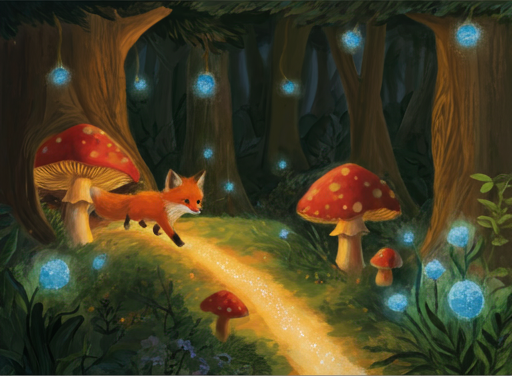

**Episode 2: The Crystal Caves**

**Title:** *Mosi, Hazel, and the Singing Crystals*

**Narrative:**

Together, Mosi and Hazel continued along the moonbeam path, which now led them downhill. The forest grew silent, and the air felt cool and damp. Then, they arrived at the entrance to a cave. But this was no ordinary cave! It glowed from within with a kaleidoscope of colors. Hesitantly, they entered, their eyes widening as they took in the sight of giant crystals hanging from the cave ceiling. Each crystal shimmered with a different hue – ruby red, sapphire blue, emerald green, and amethyst purple. And even more magical was that they were singing! Soft, melodic chimes filled the air, echoing off the crystal walls.

In the center of the cave, a little owl perched on a cluster of the largest crystals. It was Pip, an owl with eyes as bright as gold nuggets and feathers like polished silver. "Welcome," Pip hooted gently. "I am the keeper of the singing crystals. What brings you to my cave?"

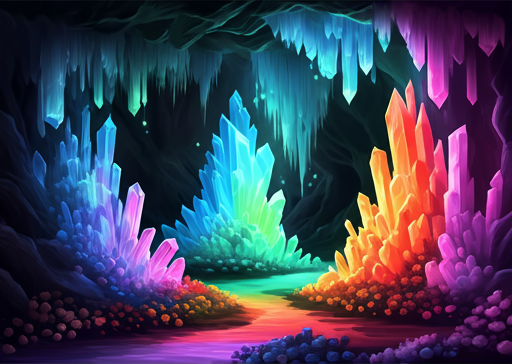



**Episode 3: The Starry Meadow**

**Title:** *Mosi Finds His Star*

**Narrative:**

The tunnel wound downwards for what felt like ages, eventually leading them to a hidden meadow. But this was no ordinary meadow! The grass shimmered with a soft blue glow, and the flowers were as tall as trees, their petals shimmering with colors they had never seen before. Floating gently in the sky, were tiny orbs that looked like miniature galaxies. The air hummed with a soft, sweet melody. In the center of the meadow, nestled among the luminescent flowers, was a single star, resting on a velvet cushion of petals. It pulsed with a gentle, warm light. It was the star they had been searching for!

As Mosi drew closer, the star seemed to reach out to him. He gently touched the star, and a warm, golden light enveloped him. Mosi felt a wave of joy and understanding wash over him. He knew that the real magic wasn't just in the star, but in the journey itself, and the friends he had made. Hazel and Pip ar

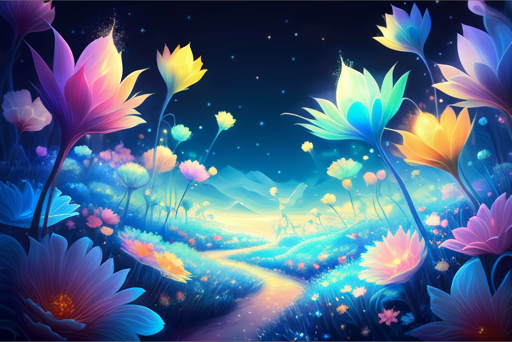

In [25]:
for part in response_data["candidates"][0]["content"]["parts"]:
    if "text" in part.keys():
        print(part["text"])
    if "inlineData" in part.keys():
        content = part["inlineData"]["data"]
        image_data = base64.b64decode(content)
        display(Image(data=image_data))

## Generate a new image from a text + image prompt
You can pass text and an image to Gemini 2.0 for use cases like product captions, information about a particular image, or to make edits or modifications to an image.

Let's try out a style transfer example and ask Gemini 2.0 to create an image of this dog in the baroque style.


![small-dog-pink](https://storage.googleapis.com/cloud-samples-data/generative-ai/image/small-dog-pink.jpg)

In [30]:
%%bash

curl -X POST \
  -H "Authorization: Bearer $(gcloud auth print-access-token)" \
  -H "Content-Type: application/json" \
  https://${API_ENDPOINT}:generateContent \
  -d '{
    "contents": {
      "role": "USER",
      "parts": [
        {"file_data": {
          "mime_type": "image/png",
          "file_uri": "gs://cloud-samples-data/generative-ai/image/small-dog-pink.jpg"
          }
        },
        {"text": "Generate a baroque style portrait painting of this dog."},
      ]

    },
    "generation_config": {
      "response_modalities": ["TEXT", "IMAGE"],
     },
  }' 2>/dev/null >response.json

Extract the image data from the response and visualize.

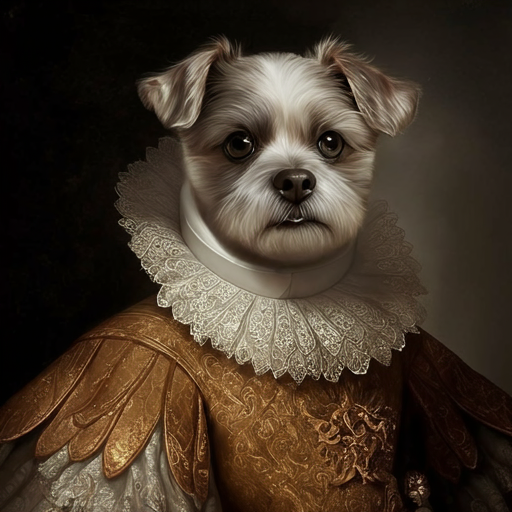

In [37]:
with open("response.json") as f:
    response_data = json.load(f)

image_part = next(
    filter(
        lambda x: "inlineData" in x,
        response_data["candidates"][0]["content"]["parts"],
    )
)

image_data = base64.b64decode(image_part["inlineData"]["data"])
display(Image(data=image_data))